In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df=pd.read_csv("dataset/delhivery_data.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   UID                             144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [4]:
numerical_cols=["start_scan_to_end_scan","cutoff_factor","actual_distance_to_destination","factor","segment_actual_time","segment_osrm_time","segment_osrm_distance","segment_factor"]

In [5]:
train_df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [6]:
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
        
    return outliers
        

In [7]:
outlier_point=detect_outliers(train_df["actual_time"])

In [9]:
len(outlier_point)

3526

<AxesSubplot: >

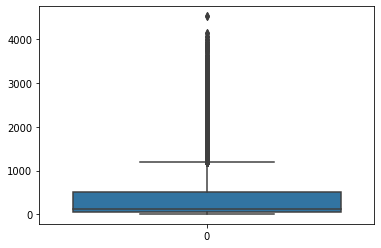

In [10]:
import seaborn as sns
sns.boxplot(train_df["actual_time"])

In [11]:
indexNames = train_df[train_df["actual_time"].isin(outlier_point)].index
train_df.drop(indexNames,inplace=True)

In [12]:
len(indexNames)

3526

In [13]:
len(train_df)

141341

In [14]:
X=train_df.drop("actual_time",axis=1)
X

,UID,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,9,2018-09-20 04:27:55,10.435660,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,18,2018-09-20 04:17:55,18.936842,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,27,2018-09-20 04:01:19.505586,27.637279,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,36,2018-09-20 03:39:57,36.118028,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,39,2018-09-20 03:33:55,39.386040,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,45,2018-09-20 21:57:20,45.258278,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,54,2018-09-20 21:31:18,54.092531,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,63,2018-09-20 21:11:18,66.163591,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,72,2018-09-20 20:53:19,73.680667,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141341 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   UID                             141341 non-null  object 
 1   trip_creation_time              141341 non-null  object 
 2   route_schedule_uuid             141341 non-null  object 
 3   route_type                      141341 non-null  object 
 4   trip_uuid                       141341 non-null  object 
 5   source_center                   141341 non-null  object 
 6   source_name                     141048 non-null  object 
 7   destination_center              141341 non-null  object 
 8   destination_name                141080 non-null  object 
 9   od_start_time                   141341 non-null  object 
 10  od_end_time                     141341 non-null  object 
 11  start_scan_to_end_scan          141341 non-null  float64
 12  is_cutoff       

In [16]:
numerical_cols=["start_scan_to_end_scan","cutoff_factor","actual_distance_to_destination","factor","segment_actual_time","segment_osrm_time","segment_osrm_distance","segment_factor"]

In [17]:
train_df["od_start_time"].value_counts()

2018-09-17 05:58:41.932416    67
2018-09-25 06:01:12.059327    66
2018-09-24 10:05:17.740347    66
2018-09-21 05:36:17.564677    66
2018-09-29 05:01:03.360152    66
                              ..
2018-09-14 05:32:13.979392     1
2018-10-04 04:15:22.552785     1
2018-09-24 03:52:09.041168     1
2018-09-13 01:59:49.985493     1
2018-09-17 04:24:25.393498     1
Name: od_start_time, Length: 26362, dtype: int64

In [18]:
y=train_df["actual_time"]
y

0          14.0
1          24.0
2          40.0
3          62.0
4          68.0
          ...  
144862     94.0
144863    120.0
144864    140.0
144865    158.0
144866    426.0
Name: actual_time, Length: 141341, dtype: float64

In [19]:
import xgboost as xg
from xgboost import XGBRegressor

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_X, val_X, train_y, val_y = train_test_split(X, y,
                      test_size = 0.2, random_state = 0)

In [ ]:
len(train_X)

In [ ]:
len(train_df["source_center"].value_counts())

In [ ]:
train_X.info()

In [22]:
train_X[numerical_cols].isna().value_counts()

start_scan_to_end_scan  cutoff_factor  actual_distance_to_destination  factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  segment_factor
False                   False          False                           False   False                False              False                  False             113072
dtype: int64

In [23]:
train_X["route_type"].value_counts()

FTL        76874
Carting    36198
Name: route_type, dtype: int64

In [24]:
categorical_cols=["route_type","source_name","destination_name","source_center","is_cutoff"]


In [25]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(train_X[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
len(encoded_cols)

4445

In [26]:
train_X[encoded_cols]=encoder.transform(train_X[categorical_cols]).copy()

In [13]:
val_X[encoded_cols]=encoder.transform(val_X[categorical_cols]).copy()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [ ]:
len(train_X.columns)

In [ ]:
train_X.info()

In [ ]:
import seaborn as sns
sns.heatmap(train_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');


In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
imputer.fit(train_df[numerical_cols])

In [ ]:
train_df[numerical_cols]

In [ ]:
train_X[numerical_cols]=imputer.transform(train_X[numerical_cols])

In [ ]:
val_X[numerical_cols]=imputer.transform(val_X[numerical_cols])

In [ ]:
train_X.head()

In [ ]:
val_X.head()

In [ ]:
train_X[numerical_cols]

In [ ]:
train_X[numerical_cols].describe().loc[['min', 'max']]

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_df[numerical_cols])

MinMaxScaler()

In [15]:
 train_X[numerical_cols]=scaler.transform(train_X[numerical_cols])

In [16]:
val_X[numerical_cols]=scaler.transform(val_X[numerical_cols])

In [17]:
train_X[numerical_cols+encoded_cols]

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,route_type_Carting,route_type_FTL,...,source_center_IND852201AAA,source_center_IND853204AAA,source_center_IND854105AAA,source_center_IND854105AAB,source_center_IND854311AAA,source_center_IND854326AAB,source_center_IND854334AAA,source_center_IND854335AAA,is_cutoff_False,is_cutoff_True
44750,0.006601,0.006778,0.007507,0.016533,0.082246,0.011794,0.011722,0.041602,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52928,0.021579,0.006778,0.007425,0.012192,0.085584,0.021726,0.021452,0.041041,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
137651,0.002285,0.006778,0.006819,0.016476,0.084370,0.014898,0.011024,0.041595,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4690,0.218330,0.293535,0.294269,0.023655,0.089833,0.010552,0.011081,0.044343,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
125053,0.254125,0.075600,0.076281,0.023738,0.081335,0.009932,0.010935,0.041734,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,0.053186,0.041189,0.041858,0.033361,0.107436,0.016760,0.017960,0.046041,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
97639,0.324321,0.236184,0.236490,0.023261,0.084370,0.009932,0.010693,0.042780,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
95939,0.047220,0.029718,0.030408,0.020693,0.085281,0.010552,0.011454,0.042866,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
117952,0.319370,0.603233,0.603296,0.028649,0.082549,0.009311,0.010108,0.042348,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
train_X[encoded_cols]

In [ ]:
train_df.info()

In [18]:
inputs=train_X[numerical_cols+encoded_cols]
targets=train_y

In [19]:
from sklearn.tree import DecisionTreeRegressor


In [37]:
inputs = inputs.to_numpy()

In [38]:
targets = targets.to_numpy

In [41]:
np.save('x_train', inputs)
np.save('y_train', targets)

In [20]:
model = DecisionTreeRegressor()
model.fit(inputs,targets)
preds=model.predict(inputs)


In [21]:
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(preds,train_y,squared=False)

In [23]:
preds2=model.predict(val_X[numerical_cols+encoded_cols])

In [24]:
rmse2=mean_squared_error(preds2,val_y,squared=False)

In [25]:
rmse2

32.04227293404991

In [22]:
rmse


0.0

In [ ]:
coeff=model.feature_importances_

In [ ]:
importance_df = pd.DataFrame({
    'feature':numerical_cols+encoded_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(20)

In [26]:
test_df=pd.read_csv("/kaggle/input/cassandra23-ps-2/dataset/test_data.csv")

In [27]:
test_df[encoded_cols]=encoder.transform(test_df[categorical_cols]).copy()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [28]:
test_df[numerical_cols]=scaler.transform(test_df[numerical_cols])

In [ ]:
test_df[numerical_cols]

In [ ]:
test_df.head(4)

In [40]:
test_df = test_df[numerical_cols+encoded_cols].to_numpy()

In [42]:
np.save('x_test', test_df)

In [29]:
y_preds=model.predict(test_df[numerical_cols+encoded_cols])

In [30]:
y_preds

array([ 40.,  68.,  15., ...,  70.,  94., 140.])

In [ ]:
y_preds=abs(y_preds)

In [31]:
data = {'UID': test_df["UID"],
        'actual_time': y_preds}
df = pd.DataFrame(data)

In [32]:
model.score(val_X[numerical_cols+encoded_cols],val_y)

0.9971598082685669

In [33]:
df

,UID,actual_time
0,XMsT9clviB,40.0
1,1iUuyRUZ2Y,68.0
2,wancwiAIU3,15.0
3,1tIt8EwJjB,76.0
4,W2vL6bJrjt,38.0
...,...,...
72153,L5IrEpNBFb,44.0
72154,s5TDXjnN3s,52.0
72155,0croXy5yK5,70.0
72156,P0okvBa2Ik,94.0


In [34]:
df.to_csv("submission15.csv", index =False)